# Лабораторна робота №2. Реалізація DFS на основі ітерацій (із стеком) та на основі рекурсії

In [3]:
class Vertex:
    def __init__(self, name):
        self.name = name
        self.visited = False
        self.adjacency_list = []

    def add_neighbor(self, vertex):
        self.adjacency_list.append(vertex)
    
    # def get_neighbors(self):
    #     return self.adjacency_list

    def __str__(self):
        return self.name

In [18]:
from collections import deque

class DepthFirstSearch:
    def __init__(self):
        self.stack = deque()

    def dfs(self, vertex_list):
        for vertex in vertex_list:
            if not vertex.visited:
                vertex.visited = True
                self.dfs_helper(vertex)

    def dfs_helper(self, root_vertex):
        self.stack.append(root_vertex)
        root_vertex.visited = True

        while self.stack:
            actual_vertex = self.stack.pop()
            print(actual_vertex)

            for neighbor in actual_vertex.adjacency_list:
                if not neighbor.visited:
                    neighbor.visited = True
                    self.stack.append(neighbor)

In [5]:
class Graph:
    def __init__(self, edges=None):
        self.vertices = {}
        if edges:
            self.add_edges(edges)

    def add_vertex(self, name):
        if name not in self.vertices:
            self.vertices[name] = Vertex(name)

    def add_edges(self, edges):
        for from_vertex, to_vertices in edges:
            self.add_vertex(from_vertex)
            for to_vertex in to_vertices:
                self.add_vertex(to_vertex)
                self.vertices[from_vertex].add_neighbor(
                    self.vertices[to_vertex])

    def get_vertex(self, name):
        return self.vertices.get(name)

    def reset_visits(self):
        for vertex in self.vertices.values():
            vertex.visited = False

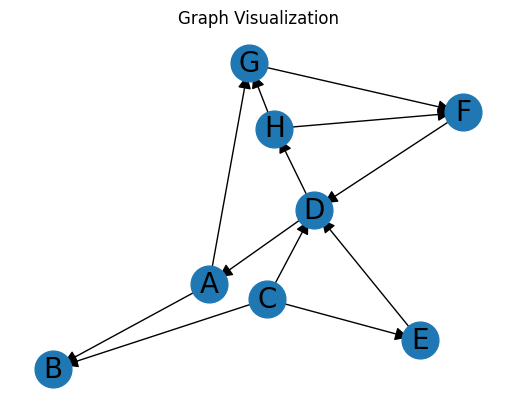

A
G
F
D
H
B
C
E


In [19]:
import networkx as nx
import matplotlib.pyplot as plt


def visualize_graph(graph):
    G = nx.DiGraph()

    for vertex in graph.vertices.values():
        G.add_node(vertex.name)
        for neighbor in vertex.adjacency_list:
            G.add_edge(vertex.name, neighbor.name)

    pos = nx.spring_layout(G, k=1)   # positions for all nodes

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=700)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(),
                           arrowstyle='-|>', arrowsize=20)

    # labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

    plt.title("Graph Visualization")
    plt.axis('off')  # turn off the axis
    plt.show()


if __name__ == "__main__":
    # Define edges
    edges = [
        ("A", ["B", "G"]),
        ("C", ["B", "D", "E"]),
        ("D", ["A", "H"]),
        ("E", ["D"]),
        ("F", ["D"]),
        ("G", ["F"]),
        ("H", ["F", "G"])
    ]

    # Create graph with edges
    graph = Graph(edges)

    # Visualize the graph
    visualize_graph(graph)

    # Perform DFS traversal
    dfs = DepthFirstSearch()  # Result: A B D E C
    dfs.dfs(list(graph.vertices.values()))

    # Reset visits for potential further use
    graph.reset_visits()